In [4]:
import time
import numpy as np
import pandas as pd
# import V4_models
import random
import polars as pl
from xgboost import XGBRegressor

import math
import pyarrow
# from Models import V4_transform_MIC_trial
from V4_models import pipeline
from Models.TrainablePipeline import TrainablePipeline1, clean_feature_names
from catboost import CatBoostRegressor

[LOADED] D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\Models\CatBoost_v2\model_cat_p17.joblib


In [5]:
p17 = {'bootstrap_type': 'Bernoulli',
 'iterations': 980,
 'learning_rate': 0.09992898451205512,
 'depth': 5,
 'l2_leaf_reg': 7.226702549314344,
 'random_strength': 1.5219169440635596,
 'rsm': 0.9708256723846282,
 'grow_policy': 'Lossguide',
 'subsample': 0.9509472926783357,'verbose':False, 'random_state':42}
df_MIC = pd.read_csv(r'D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\data\preprocessed\final_df1_catboost_orig.csv', low_memory=False, index_col=0)
df_MIC_bacteria = pd.read_csv(r'D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\data\preprocessed\final_df1_catboost_orig_bact.csv', low_memory=False, index_col=0)

X = df_MIC_bacteria.drop(['MIC_NP___g_mL_'], axis=1) # no need for concentration, zoi or gi as all of these parameters will be predicted
test_set = pd.read_csv(r'D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\test_set_df1.csv', index_col=0)

# print(X)

In [ ]:
# pipeline.plot_top_features_gradient1(top_n=40)
preds = pipeline.predict()

In [10]:
df_MIC = pd.read_csv(r'D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\data\preprocessed\final_df1_catboost_orig.csv', low_memory=False, index_col=0)
df_MIC_bacteria = pd.read_csv(r'D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\data\preprocessed\final_df1_catboost_orig_bact.csv', low_memory=False, index_col=0)

X = df_MIC_bacteria.drop(['MIC_NP___g_mL_'], axis=1) # no need for concentration, zoi or gi as all of these parameters will be predicted
test_set = pd.read_csv(r'D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\test_set_df1.csv', index_col=0)

# print(X)

In [4]:
df_MIC.columns

Index(['np_size_min__nm_', 'np_size_avg__nm_', 'np_size_max__nm_',
       'Source_origin', 'method', 'Capping_type', 'time_set__hours_',
       'Solvent_for_extract', 'shape', 'Template_type', 'Bio_component_class',
       'chi0v', 'Red_env_strength', 'Red_env_type', 'coating',
       'Valance_electron', 'Solvent_polar', 'mdr', 'prim_specific_habitat',
       'lipinskiHBA', 'CrippenClogP', 'max_Incub_period__h', 'hallKierAlpha',
       'amw', 'avg_Incub_period__h', 'K07123', 'kappa1', 'K03629',
       'min_Incub_period__h', 'K07050', 'K20345', 'NumHBA', 'sec_habitat',
       'bac_type', 'K23945', 'common_environment', 'K01191', 'K13566',
       'K07484', 'K25602', 'K11206', 'K07486', 'K12942', 'K01153', 'K02027',
       'K00849', 'K01878', 'K00432', 'K01026', 'K10844', 'K03741', 'K00252',
       'K01190', 'K03703', 'K09936', 'K07485', 'K07778', 'K16148',
       'MIC_NP___g_mL_'],
      dtype='object')

In [19]:
df_MIC.select_dtypes('object').columns.to_list()

['Source_origin',
 'method',
 'Capping_type',
 'Solvent_for_extract',
 'shape',
 'Template_type',
 'Bio_component_class',
 'Red_env_strength',
 'Red_env_type',
 'prim_specific_habitat',
 'sec_habitat',
 'bac_type',
 'common_environment']

In [23]:
df = df_MIC
cols = df_MIC.select_dtypes('object').columns.to_list()
res = pd.DataFrame()
for col in cols:
    l = sorted(df[col].astype(str).unique())
    columns_df = pd.DataFrame({
        "index": range(len(l)),
        "column_name": l
    })
    res = pd.concat([res, columns_df])
    # display(columns_df.set_index('index'))
res

,index,column_name
0,0,commercial
1,1,lab
0,0,MBC
1,1,MBEC
2,2,MFC
...,...,...
2,2,animals
3,3,animals (birds)
4,4,human
5,5,nature


In [4]:
test_set = pd.read_csv(r'D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\test_set_df1.csv', index_col=0)
test_set

,coating,mdr,MIC_NP (µg/mL),np_size_min (nm),np_size_max (nm),np_size_avg (nm),time_set (hours),article_list,year,"min_Incub_period, h",...,sec_habitat,Red_env_type,Red_env_strength,Capping_type,Bio_component_class,Template_type,Post_treatment,Source_origin,Canonical_smiles,bacteria_strain
46,0.0,0.0,3.465736,15.0,25.0,20.0,24.0,4.0,2022.0,8.0,...,nosocomial,chemical,medium,small-molecule,NaN,none,none,commercial,[Ag],Acinetobacter baumannii BAA-747
47,0.0,0.0,4.158883,15.0,25.0,20.0,24.0,4.0,2022.0,1.5,...,mouth,chemical,medium,small-molecule,NaN,none,none,commercial,[Ag],Escherichia coli ATCC 25922
48,0.0,0.0,4.852030,15.0,25.0,20.0,24.0,4.0,2022.0,3.0,...,"clinical samples (blood, wound swabs)",chemical,medium,small-molecule,NaN,none,none,commercial,[Ag],Klebsiella pneumoniae ATCC 13883
49,1.0,0.0,4.158883,15.0,25.0,20.0,18.0,4.0,2022.0,1.5,...,mouth,chemical,medium,small-molecule,NaN,none,none,commercial,[Ag],Escherichia coli ATCC 25922
50,1.0,0.0,4.852030,15.0,25.0,20.0,18.0,4.0,2022.0,3.0,...,"clinical samples (blood, wound swabs)",chemical,medium,small-molecule,NaN,none,none,commercial,[Ag],Klebsiella pneumoniae ATCC 13883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,0.0,0.0,1.832581,17.5,23.7,20.6,24.0,203.0,2018.0,24.0,...,water,chemical,medium,none,NaN,none,none,commercial,[Ag],Campylobacter jejuni NCTC 11168
1490,0.0,0.0,1.832581,17.5,23.7,20.6,24.0,203.0,2018.0,24.0,...,water,chemical,medium,none,NaN,none,none,commercial,[Ag],Campylobacter jejuni nan
1491,0.0,0.0,1.137833,17.5,23.7,20.6,24.0,203.0,2018.0,24.0,...,water,chemical,medium,none,NaN,none,none,commercial,[Ag],Campylobacter jejuni nan
1492,0.0,0.0,1.832581,17.5,23.7,20.6,24.0,203.0,2018.0,24.0,...,water,chemical,medium,none,NaN,none,none,commercial,[Ag],Campylobacter jejuni 2674


Cleaned data shape: (1365, 59)
Reduced dimensions: (1365, 59)
[FIT] CatBoostRegressor | R2=0.8383 | RMSE=0.8878


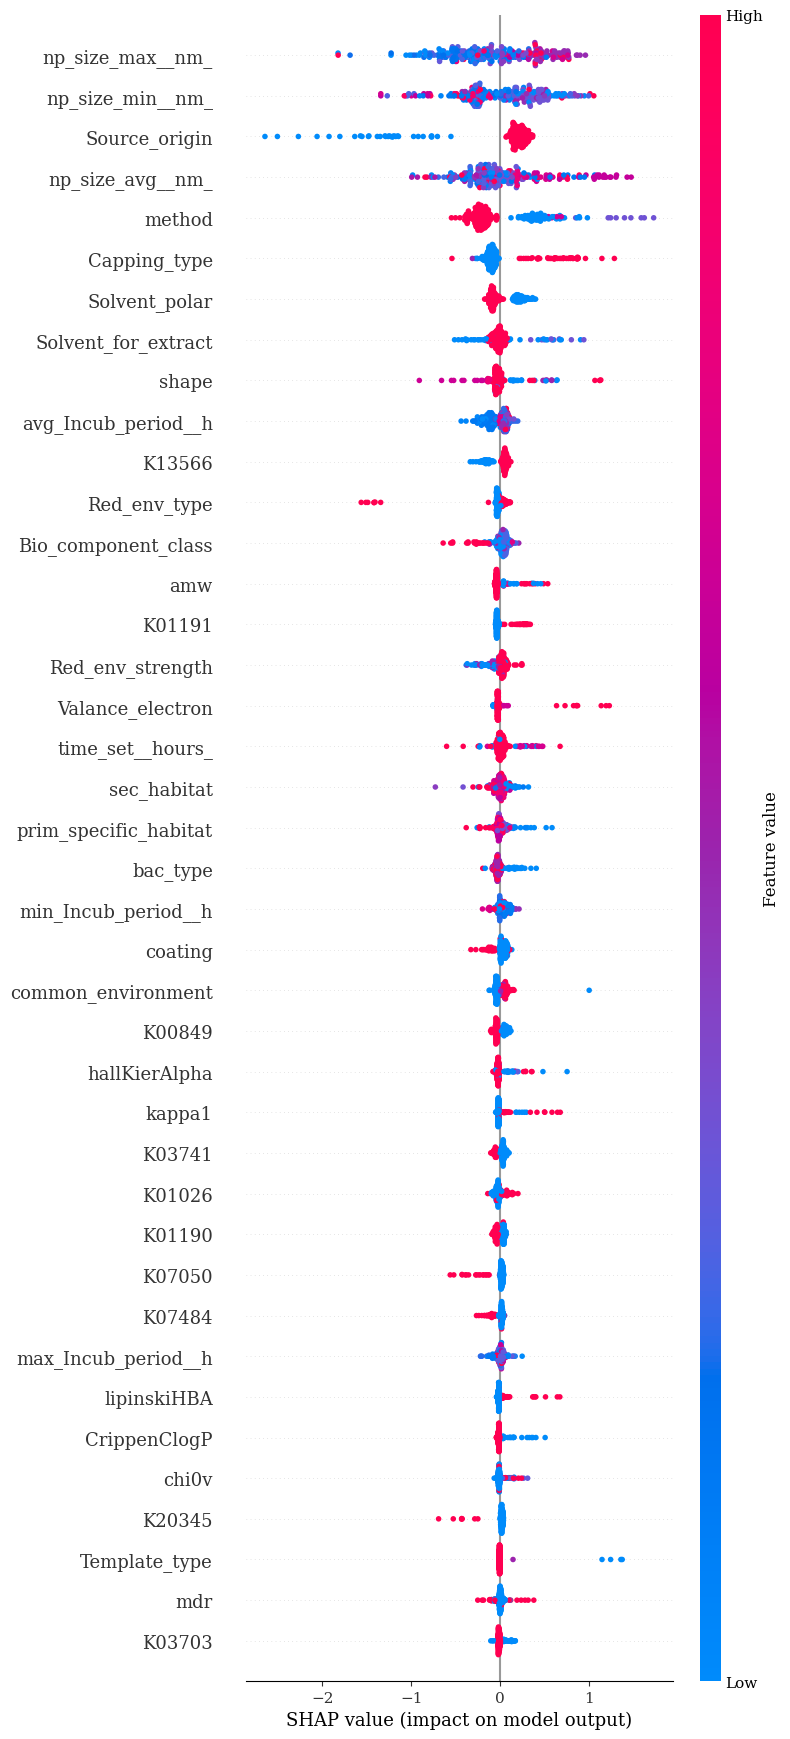

In [9]:
# X[X['amw'] == 81.389].drop_duplicates().to_csv('a.csv')
# import chardet
test_set.columns = clean_feature_names(test_set)
test_df = test_set[df_MIC.columns]
cols = []
df_MIC['Bio_component_class'] = df_MIC["Bio_component_class"].fillna('none')
pipeline_shap = TrainablePipeline1(pl.from_pandas(df_MIC))
final_model = CatBoostRegressor(**p17)
pipeline_shap.fit(final_model)
# pipeline_shap.cross_validate(model_cls=CatBoostRegressor, model_params=p17, test_df=test_df)
pipeline_shap.plot_shap(max_display=40)

In [11]:
a = pd.read_csv(r'D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\data\to_predict.csv', low_memory=False, sep = ';', index_col=0, encoding="cp1251").reset_index(drop=True)
# a['chi0v'][0] = a['chi0v'][1]
# a['CrippenClogP'][0] = a['CrippenClogP'][1]
# a['min_Incub_period__h'][4] = '1'
# a['min_Incub_period__h'] = a['min_Incub_period__h'].astype('float')




In [31]:
a

,np_size_min__nm_,np_size_avg__nm_,np_size_max__nm_,Source_origin,method,Capping_type,time_set__hours_,Solvent_for_extract,shape,Template_type,...,K03741,K00252,K01190,K03703,K09936,K07485,K07778,K16148,bacteria_strain,Unnamed: 60
0,30,30,30,lab,MIC,none,24.0,water,spherical,none,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,Bacillus subtilis nan,NaN
1,30,30,30,lab,MIC,none,24.0,water,spherical,none,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Escherichia coli nan,chemical_synthesis by aqueous zinc sulfate hep...
2,30,30,30,lab,MIC,none,24.0,water,spherical,none,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Staphylococcus aureus NCIM 5021,chemical_synthesis using sodium borohydride an...
3,30,30,30,lab,MIC,none,18.0,water,spherical,none,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Pseudomonas aeruginosa ATCC 27853,chemical_synthesis purchased from sigma aldric...


a = pd.read_csv('D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\data\to_predict.csv')

In [39]:
# X[(X['bacteria_strain'] == 'Pseudomonas aeruginosa nan') ]
a

,np_size_min__nm_,np_size_avg__nm_,np_size_max__nm_,Source_origin,method,Capping_type,time_set__hours_,Solvent_for_extract,shape,Template_type,...,K03741,K00252,K01190,K03703,K09936,K07485,K07778,K16148,bacteria_strain,Unnamed: 60
0,480,480,480,lab,MIC,none,24.0,water,spherical,none,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,Bacillus subtilis nan,NaN
1,480,480,480,lab,MIC,none,24.0,water,spherical,none,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,Bacillus subtilis nan,NaN
2,480,480,480,lab,MIC,none,24.0,water,spherical,none,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Pseudomonas aeruginosa nan,chemical_synthesis purchased from sigma aldric...
3,480,480,480,lab,MIC,none,24.0,water,spherical,none,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Staphylococcus aureus ATCC 29213,"Chemical synthesis, purchased from Sigma-Aldrich"
4,480,480,480,lab,MIC,none,24.0,water,spherical,none,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Escherichia coli nan,chemical_synthesis by aqueous zinc sulfate hep...


In [32]:
a_p =  pipeline.predict(pl.from_pandas(a))

In [33]:
# a_p.
# a_p['restored_values'] = np.exp(a_p)
a_p =  pipeline.predict(pl.from_pandas(a))
a_pb = np.exp(a_p)
a_pb

array([66.54926602, 41.05608726, 33.33883288, 76.77768181])

In [2]:
pipeline.plot_top_features_gradient(top_n=20)

TypeError: BasicPipeline.plot_top_features_gradient() missing 2 required positional arguments: 'model' and 'feature_names'

In [3]:
pipeline.plot_shap()


CatBoostError: 'data' parameter can't be None

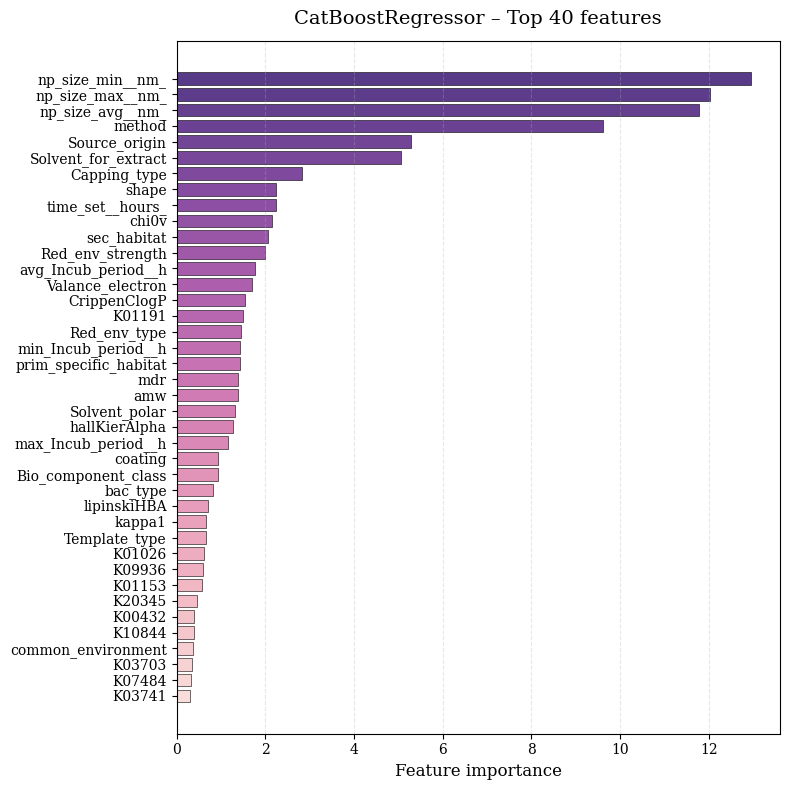

In [8]:
# pipeline.fit(model)
pipeline.plot_top_features_gradient1(top_n=40)


In [9]:
pipeline.plot_top_features_gradient(
    top_n=40,
    fname="feature_importance.pdf"
)


TypeError: BasicPipeline.plot_top_features_gradient() missing 2 required positional arguments: 'model' and 'feature_names'

In [12]:
res = pd.DataFrame()

Cleaned data shape: (1365, 59)
Reduced dimensions: (1365, 59)
[FIT] CatBoostRegressor | R2=0.8383 | RMSE=0.8878


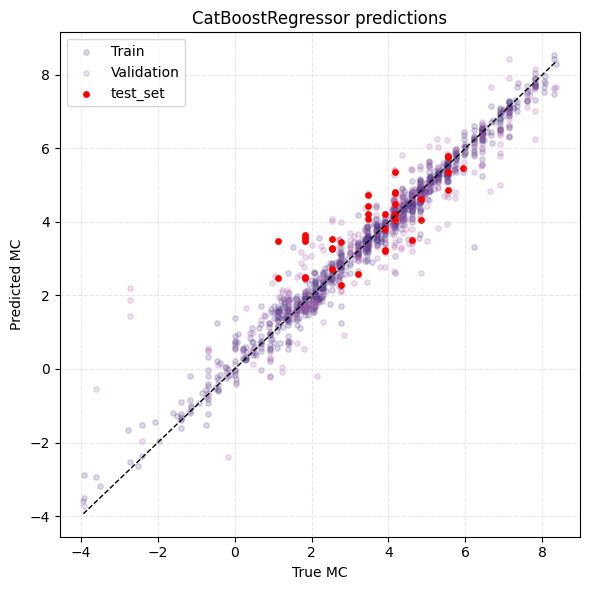

In [14]:
good_ref = [
    'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9495250/',
    'https://link.springer.com/article/10.1007/s11274-017-2406-3',
    'https://www.sciencedirect.com/science/article/pii/S0956713518302330?via%3Dihub#sec3',
]

col = ''
value = ''

test_set.columns = clean_feature_names(test_set)
test_set = test_set[test_set['reference'].isin(good_ref)]
test_df = test_set[df_MIC.columns]
# test_df = test_df[test_df[col] == value]
df_MIC['Bio_component_class'] = df_MIC["Bio_component_class"].fillna('none')
pipeline_shap = TrainablePipeline1(pl.from_pandas(df_MIC), dataset_name=f'test {col}: {value}')
final_model = CatBoostRegressor(**p17)
# final_model = CatBoostRegressor(**{'verbose':False, 'random_state':42})
pipeline_shap.fit(final_model)
# log_df = pipeline_shap.cross_validate(model_cls=CatBoostRegressor, model_params=p17, test_df=test_df)
preds = pipeline_shap.predict1(pl.from_pandas(test_df),test_set_name=f'test_set')

# res = pd.concat([res, log_df], axis=0)



In [17]:
# res = pd.concat([res, log_df], axis=0)
res

,model,dataset,n_splits,train_r2_mean,val_r2_mean,test_r2_mean,train_rmse_mean,val_rmse_mean,test_rmse_mean,test_mae_mean,train_samples,val_samples,test_samples,n_features
0,CatBoostRegressor,test method: MIC,10,0.976963,0.82083,0.849655,0.331556,0.919448,0.488495,0.391288,1365,136,23,58
0,CatBoostRegressor,test method: MIC,10,0.976963,0.82083,0.849655,0.331556,0.919448,0.488495,0.391288,1365,136,23,58
0,CatBoostRegressor,test method: MBC,10,0.976963,0.82083,0.426110,0.331556,0.919448,1.035500,0.866076,1365,136,14,58
0,CatBoostRegressor,test method: MBC,10,0.976963,0.82083,0.426110,0.331556,0.919448,1.035500,0.866076,1365,136,14,58


In [14]:
# XGBRegressor

x1 = {'random_state':42, 'n_estimators': 2300, 'learning_rate': 0.05462955234321623, 'max_depth': 5, 'min_child_weight': 1.152835720052993, 'max_leaves': 19, 'gamma': 0.024107618152975435, 'reg_alpha': 0.000620795932468093, 'reg_lambda': 0.6212518892598466, 'subsample': 0.8869361817917535, 'colsample_bytree': 0.9767071810347471, 'grow_policy': 'depthwise', 'tree_method':'hist', 'n_jobs':1}
x2 = {'n_estimators': 2400, 'learning_rate': 0.0745190970943672, 'max_depth': 5, 'min_child_weight': 0.7609660759221031, 'max_leaves': 30, 'gamma': 0.00041114874821732497, 'reg_alpha': 0.00047744369165460135, 'reg_lambda': 0.5057003864663966, 'subsample': 0.884442312191503, 'colsample_bytree': 0.9735260112042289, 'grow_policy': 'depthwise', 'random_state':42, 'n_jobs':1}
x3 = {'n_estimators': 1400, 'learning_rate': 0.09300039576787837, 'max_depth': 4, 'min_child_weight': 0.2531466898550219, 'max_leaves': 177, 'gamma': 0.026592255537413102, 'reg_alpha': 0.0028243435758436423, 'reg_lambda': 2.4729681422233027, 'subsample': 0.9397657727939068, 'colsample_bytree': 0.9163614175818913, 'grow_policy': 'depthwise', 'random_state':42, 'n_jobs':1}

x4 = {'n_estimators': 800, 'learning_rate': 0.13487868839410647, 'max_depth': 4, 'min_child_weight': 1.6829122375946248, 'gamma': 0.01918131253128596, 'reg_alpha': 0.0004425125593817839, 'reg_lambda': 2.132593236506893, 'subsample': 0.8859540814398501, 'colsample_bytree': 0.6748554035126267,'n_jobs':1, 'random_state':42}


x5 = {'n_estimators': 2000, 'learning_rate': 0.053751194894603394, 'max_depth': 4, 'min_child_weight': 0.23064643228085238, 'max_leaves': 101, 'gamma': 0.0166809902079511, 'reg_alpha': 0.0017888828021762422, 'reg_lambda': 2.4433583167751016, 'subsample': 0.9319871755464246, 'colsample_bytree': 0.9094623107413948, 'grow_policy': 'depthwise','n_jobs':1, 'random_state':42}

x6 = {'n_estimators': 700, 'learning_rate': 0.11323329302410087, 'max_depth': 4, 'min_child_weight': 1.6626891398809875, 'gamma': 0.019972434236233613, 'reg_alpha': 0.0035980837342695204, 'reg_lambda': 1.8944016458619648, 'subsample': 0.8151724239390211, 'colsample_bytree': 0.6381819396347838,'n_jobs':1, 'random_state':42}

x7 = {'n_estimators': 1000, 'learning_rate': 0.0669275295632514, 'max_depth': 4, 'min_child_weight': 1.029521307219897, 'gamma': 0.08092681759710604, 'reg_alpha': 0.08613110419941049, 'reg_lambda': 1.373595411802084, 'subsample': 0.8854115310663128, 'colsample_bytree': 0.7084982699309933,'n_jobs':1, 'random_state':42}

x8 = {'n_estimators': 950, 'learning_rate': 0.10431821252698266, 'max_depth': 4, 'min_child_weight': 3.506529293629173, 'gamma': 0.15825133644415784, 'reg_alpha': 0.007868808583988248, 'reg_lambda': 0.609701776628851, 'subsample': 0.8975195429780363, 'colsample_bytree': 0.5061030345252129,'n_jobs':1, 'random_state':42}



x11 = {'n_estimators': 750, 'learning_rate': 0.10974613698975848, 'max_depth': 4, 'min_child_weight': 2.010093408346028, 'gamma': 0.029291180457375606, 'reg_alpha': 0.04340970103747453, 'reg_lambda': 1.5799381959405414, 'subsample': 0.8088701667186351, 'colsample_bytree': 0.6034592244980531,'n_jobs':1, 'random_state':42}

x10 = {'n_estimators': 850, 'learning_rate': 0.0550300364755688, 'max_depth': 6, 'min_child_weight': 2.8909083464928718, 'gamma': 0.07165958167365705, 'reg_alpha': 0.008499741975887449, 'reg_lambda': 1.7375872413314524, 'subsample': 0.8172204638940629, 'colsample_bytree': 0.5200574885084537,'n_jobs':1, 'random_state':42}

x9 = {'n_estimators': 750, 'learning_rate': 0.11379840880008547, 'max_depth': 4, 'min_child_weight': 1.0633150608870485, 'gamma': 0.0702472898447235, 'reg_alpha': 0.0008568906747170446, 'reg_lambda': 0.6151777952008384, 'subsample': 0.8378571387845369, 'colsample_bytree': 0.689713861295446,'n_jobs':1, 'random_state':42}

xs = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11]

In [9]:
df_MIC_path = pd.read_csv(r'D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\data\preprocessed\MIC_path_preprocessed.csv', low_memory=False, index_col=0)
# path_small= reduce_dimensionality_fast(path_small)

In [5]:
res=pd.DataFrame()

In [25]:
df_MIC_path

,np,coating,bacteria,mdr,strain,np_synthesis,method,MIC_NP (µg/mL),np_size_min (nm),np_size_max (nm),...,ecol00380,ecol00362,paeb00450,bbe00643,pswo00362,stv03070,efu00261,senj00633,kpi01230,seps00360
0,Ag,0,Bacillus subtilis,0,MTCC 441,chemical_synthesis using sodium borohydride an...,MIC,3.688879,2.26,10.34,...,0,0,0,0,0,0,0,0,0,0
1,Ag,0,Bacillus subtilis,0,MTCC 441,chemical_synthesis using sodium borohydride an...,MBC,4.094345,2.26,10.34,...,0,0,0,0,0,0,0,0,0,0
2,Ag,0,Escherichia coli,0,MTCC 443,chemical_synthesis using sodium borohydride an...,MIC,3.688879,2.26,10.34,...,0,0,0,0,0,0,0,0,0,0
3,Ag,0,Escherichia coli,0,MTCC 739,chemical_synthesis using sodium borohydride an...,MIC,5.192957,2.26,10.34,...,0,0,0,0,0,0,0,0,0,0
4,Ag,0,Escherichia coli,0,MTCC 1302,chemical_synthesis using sodium borohydride an...,MIC,4.787492,2.26,10.34,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,Ag,0,Campylobacter jejuni,0,2674,"Chemical synthesis, purchased from Nanocomposix",MBC,1.832581,17.50,23.70,...,0,0,0,0,0,0,0,0,0,0
1493,Ag,0,Campylobacter jejuni,0,NCTC 11168,"Chemical synthesis, purchased from Nanocomposix",MBC,1.832581,17.50,23.70,...,0,0,0,0,0,0,0,0,0,0
1494,Ag,0,Escherichia coli,1,NaN,Green synthesis using Acinetobacter baumannii,MIC,1.139434,15.00,45.00,...,0,0,0,0,0,0,0,0,0,0
1495,Ag,0,Klebsiella pneumoniae,1,NaN,Green synthesis using Acinetobacter baumannii,MIC,0.444686,15.00,45.00,...,0,0,0,0,0,0,0,0,0,0


In [5]:
good_ref = [
    'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9495250/',
    'https://link.springer.com/article/10.1007/s11274-017-2406-3',
    'https://www.sciencedirect.com/science/article/pii/S0956713518302330?via%3Dihub#sec3',
]

Cleaned data shape: (1365, 59)
Reduced dimensions: (1365, 59)
[FIT] XGBRegressor | R2=0.8316 | RMSE=0.9060
Cleaned data shape: (1365, 59)
Reduced dimensions: (1365, 59)
[CV] Fold 1/10
[CV] Fold 2/10
[CV] Fold 3/10
[CV] Fold 4/10
[CV] Fold 5/10
[CV] Fold 6/10
[CV] Fold 7/10
[CV] Fold 8/10
[CV] Fold 9/10
[CV] Fold 10/10

[CV RUN SUMMARY]
                                                                 0
model                                                 XGBRegressor
dataset                                                 test []: a
n_splits                                                        10
hyperparams      {'random_state': 42, 'n_estimators': 2300, 'le...
train_r2_mean                                             0.985504
val_r2_mean                                               0.819942
test_r2_mean                                              0.719072
train_rmse_mean                                           0.262922
val_rmse_mean                                             0

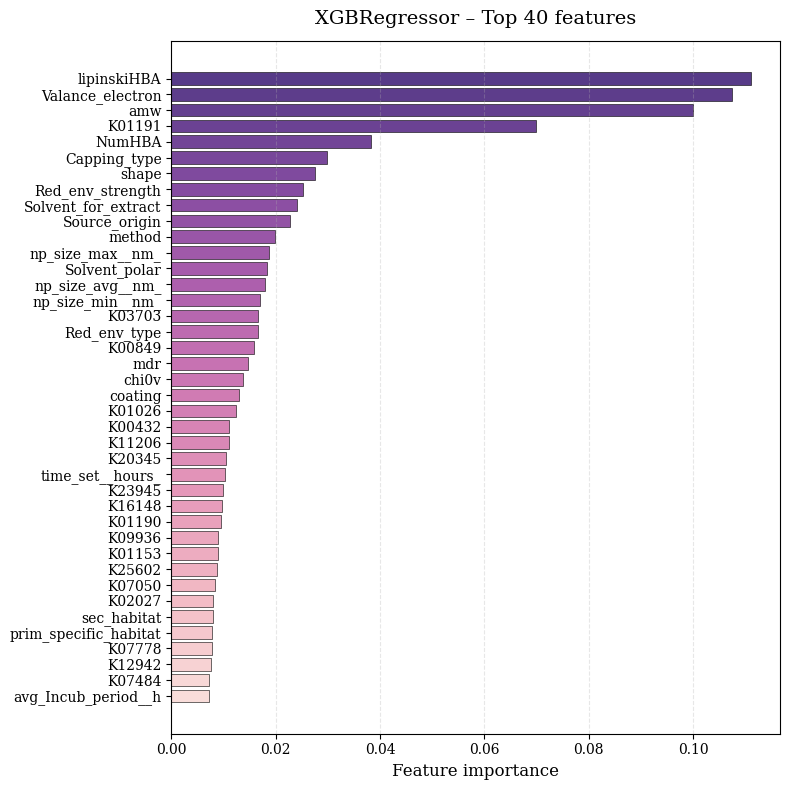

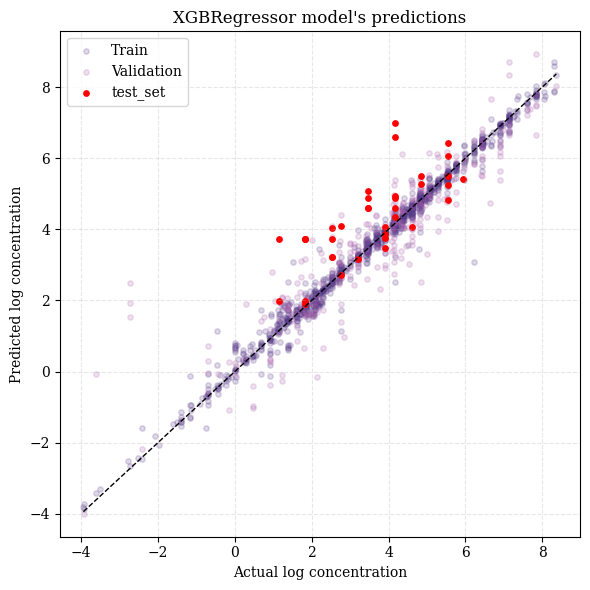

NameError: name 'res' is not defined

In [15]:
from xgboost import XGBRegressor
good_ref = [
    'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9495250/',
    'https://link.springer.com/article/10.1007/s11274-017-2406-3',
    'https://www.sciencedirect.com/science/article/pii/S0956713518302330?via%3Dihub#sec3',
]
test_set.columns = clean_feature_names(test_set)
test_set = test_set[test_set['reference'].isin(good_ref)]
# test_df = test_set[df_MIC.columns]
# test_df = test_df[test_df[col] == value]

col = []
value = 'a'
df_MIC = pd.read_csv(r'D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\data\preprocessed\final_df1_catboost_orig.csv', low_memory=False, index_col=0)
df_MIC_bacteria = pd.read_csv(r'D:\NPs_Platform_df1\NPs_Platform_df1\V4_MIC\data\preprocessed\final_df1_catboost_orig_bact.csv', low_memory=False, index_col=0)
test_df = test_set[df_MIC.columns]
df_MIC['Bio_component_class'] = df_MIC["Bio_component_class"].fillna('none')

for x in xs:
    pipeline_shap = TrainablePipeline1(pl.from_pandas(df_MIC), dataset_name=f'test {col}: {value}')


    final_model = XGBRegressor(**x)
    # final_model = CatBoostRegressor(**{'verbose':False, 'random_state':42})
    pipeline_shap.fit(final_model)
    log_df = pipeline_shap.cross_validate(model_cls=XGBRegressor, model_params=x, test_df = test_df)
    preds = pipeline_shap.plot_top_features_gradient1()
    preds = pipeline_shap.predict1(pl.from_pandas(test_df),test_set_name=f'test_set')
    res = pd.concat([res, log_df], axis=0)


In [17]:
res
    # .sort_values('val_r2_mean', ascending=False)

,model,dataset,n_splits,hyperparams,train_r2_mean,val_r2_mean,test_r2_mean,train_rmse_mean,val_rmse_mean,test_rmse_mean,test_mae_mean,train_samples,val_samples,test_samples,n_features
0,XGBRegressor,test []: a,10,"{'random_state': 42, 'n_estimators': 2300, 'le...",0.985504,0.819942,0.719072,0.262922,0.920038,0.696250,0.508178,1365,136,37,58
0,XGBRegressor,test []: a,10,"{'random_state': 42, 'n_estimators': 2300, 'le...",0.985504,0.819942,0.719072,0.262922,0.920038,0.696250,0.508178,1365,136,37,58
0,XGBRegressor,test []: a,10,"{'random_state': 42, 'n_estimators': 2300, 'le...",0.985504,0.819942,0.719072,0.262922,0.920038,0.696250,0.508178,1365,136,37,58
0,XGBRegressor,test []: a,10,"{'random_state': 42, 'n_estimators': 2300, 'le...",0.985504,0.819942,0.719072,0.262922,0.920038,0.696250,0.508178,1365,136,37,58
0,XGBRegressor,test []: a,10,"{'n_estimators': 2400, 'learning_rate': 0.0745...",0.988090,0.817167,0.649930,0.238209,0.927247,0.762696,0.539327,1365,136,37,58
0,XGBRegressor,test []: a,10,"{'n_estimators': 1400, 'learning_rate': 0.0930...",0.980670,0.826668,0.728125,0.303723,0.903990,0.678566,0.508893,1365,136,37,58
0,XGBRegressor,test []: a,10,"{'n_estimators': 800, 'learning_rate': 0.13487...",0.977878,0.820282,0.759515,0.324912,0.921795,0.640802,0.492489,1365,136,37,58
0,XGBRegressor,test []: a,10,"{'n_estimators': 2000, 'learning_rate': 0.0537...",0.979138,0.824540,0.780124,0.315535,0.908609,0.616879,0.475660,1365,136,37,58
0,XGBRegressor,test []: a,10,"{'n_estimators': 700, 'learning_rate': 0.11323...",0.971869,0.814738,0.746692,0.366448,0.935366,0.662849,0.520307,1365,136,37,58
0,XGBRegressor,test []: a,10,"{'n_estimators': 1000, 'learning_rate': 0.0669...",0.967838,0.815104,0.739057,0.391878,0.933856,0.669947,0.531467,1365,136,37,58


In [10]:
classes_cv = pd.DataFrame()

In [67]:
df_MIC

,np_size_min__nm_,np_size_avg__nm_,np_size_max__nm_,Source_origin,method,Capping_type,time_set__hours_,Solvent_for_extract,shape,Template_type,...,K10844,K03741,K00252,K01190,K03703,K09936,K07485,K07778,K16148,MIC_NP___g_mL_
0,2.26,3.32,10.34,lab,MIC,none,24.0,water,spherical,none,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.688879
1,2.26,3.32,10.34,lab,MBC,none,24.0,water,spherical,none,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.094345
2,2.26,3.32,10.34,lab,MIC,none,24.0,water,spherical,none,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.688879
3,2.26,3.32,10.34,lab,MIC,none,24.0,water,spherical,none,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.192957
4,2.26,3.32,10.34,lab,MIC,none,24.0,water,spherical,none,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.787492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,20.00,40.00,50.00,lab,MFC,none,24.0,aceton,spherical,none,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.824046
1476,20.00,40.00,50.00,lab,MFC,none,24.0,aceton,spherical,none,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.824046
1494,15.00,30.00,45.00,lab,MIC,none,18.0,water,spherical,none,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.139434
1495,15.00,30.00,45.00,lab,MIC,none,18.0,water,spherical,none,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.444686


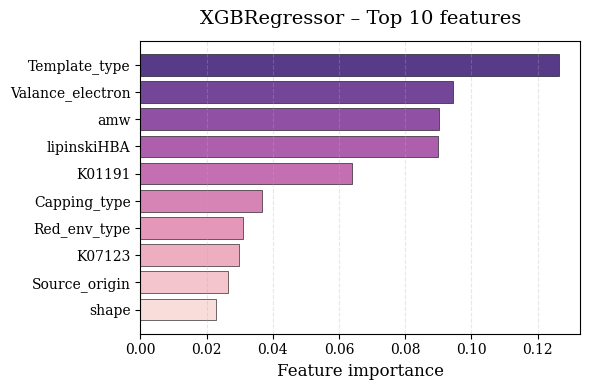

In [8]:
preds = pipeline_shap.plot_top_features_gradient1(top_n=10, figsize=(6,4))


In [14]:
classes_cv

,model,dataset,n_splits,hyperparams,train_r2_mean,val_r2_mean,test_r2_mean,train_rmse_mean,val_rmse_mean,test_rmse_mean,test_mae_mean,train_samples,val_samples,test_samples,n_features
0,XGBRegressor,test bac_type: non-pathogenic,10,"{'n_estimators': 1400, 'learning_rate': 0.0930...",0.980539,0.825439,0.732086,0.304750,0.906405,0.674831,0.493077,1365,136,37,58
0,XGBRegressor,test bac_type: non-pathogenic,10,{'random_state': 42},0.981121,0.800327,0.448726,0.300021,0.967819,0.969206,0.703540,1365,136,37,58
0,CatBoostRegressor,test bac_type: non-pathogenic,10,"{'bootstrap_type': 'Bernoulli', 'iterations': ...",0.976556,0.821575,0.684116,0.334497,0.917807,0.735116,0.567647,1365,136,37,58
0,CatBoostRegressor,test bac_type: non-pathogenic,10,"{'verbose': False, 'random_state': 42}",0.937858,0.791177,0.422567,0.544804,0.992485,0.996450,0.780673,1365,136,37,58


Cleaned data shape: (1365, 59)
Reduced dimensions: (1365, 59)
[FIT] CatBoostRegressor | Train R2=0.9771 | Train RMSE=0.3300
[FIT] CatBoostRegressor | Test R2=0.8363 | Test RMSE=0.8932


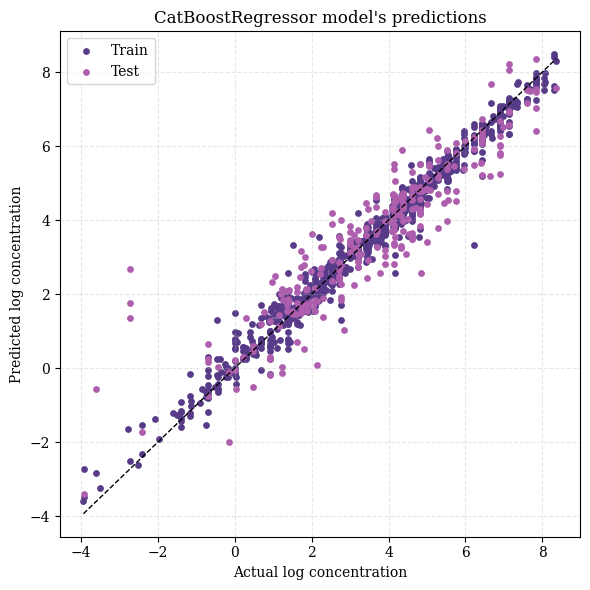

Cleaned data shape: (1365, 59)
Reduced dimensions: (1365, 59)
[CV] Fold 1/10
[CV] Fold 2/10
[CV] Fold 3/10
[CV] Fold 4/10
[CV] Fold 5/10
[CV] Fold 6/10
[CV] Fold 7/10
[CV] Fold 8/10
[CV] Fold 9/10
[CV] Fold 10/10

[CV RUN SUMMARY]
                                                                 0
model                                            CatBoostRegressor
dataset                              test bac_type: non-pathogenic
n_splits                                                        10
hyperparams      {'bootstrap_type': 'Bernoulli', 'iterations': ...
train_r2_mean                                             0.976556
val_r2_mean                                               0.821575
test_r2_mean                                              0.684116
train_rmse_mean                                           0.334497
val_rmse_mean                                             0.917807
test_rmse_mean                                            0.735116
test_mae_mean                   

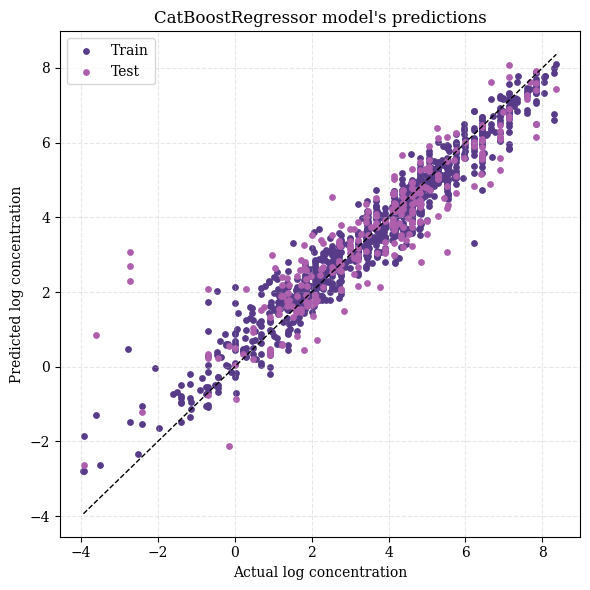

Cleaned data shape: (1365, 59)
Reduced dimensions: (1365, 59)
[CV] Fold 1/10
[CV] Fold 2/10
[CV] Fold 3/10
[CV] Fold 4/10
[CV] Fold 5/10
[CV] Fold 6/10
[CV] Fold 7/10
[CV] Fold 8/10
[CV] Fold 9/10
[CV] Fold 10/10

[CV RUN SUMMARY]
                                                      0
model                                 CatBoostRegressor
dataset                   test bac_type: non-pathogenic
n_splits                                             10
hyperparams      {'verbose': False, 'random_state': 42}
train_r2_mean                                  0.937858
val_r2_mean                                    0.791177
test_r2_mean                                   0.422567
train_rmse_mean                                0.544804
val_rmse_mean                                  0.992485
test_rmse_mean                                  0.99645
test_mae_mean                                  0.780673
train_samples                                      1365
val_samples                              

In [13]:
final_model = CatBoostRegressor(**p17)
pipeline_shap.fit1(final_model, fname='Cat_tuned_fit1.png')
log_df = pipeline_shap.cross_validate(model_cls=CatBoostRegressor, model_params=p17, test_df = test_df)
classes_cv = pd.concat([classes_cv, log_df], axis=0)

final_model = CatBoostRegressor(**{'verbose':False, 'random_state':42})
pipeline_shap.fit1(final_model, fname='Cat_default_fit1.png')
log_df = pipeline_shap.cross_validate(model_cls=CatBoostRegressor, model_params={'verbose':False, 'random_state':42}, test_df = test_df)
classes_cv = pd.concat([classes_cv, log_df], axis=0)


In [2]:
df_MIC

NameError: name 'df_MIC' is not defined

Cleaned data shape: (1365, 59)
Reduced dimensions: (1365, 59)
[FIT] XGBRegressor | R2=0.8313 | RMSE=0.9068


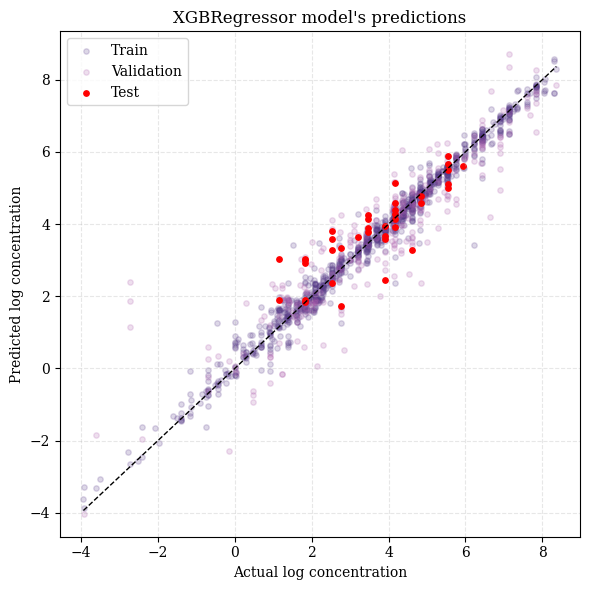

In [49]:
values = ['lab', 'commercial', 0,1, 'MIC', 'MBC', 'pathogenic', 'opportunistic pathogen', 'non-pathogenic', 'fullsize']
colss = ['Source_origin', 'mdr', 'method', 'bac_type', '']
col = colss[3]
value = values[8]

pipeline_shap = TrainablePipeline1(pl.from_pandas(df_MIC), dataset_name=f'test {col}: {value}')

test_set.columns = clean_feature_names(test_set)
test_set = test_set[test_set['reference'].isin(good_ref)]
test_df = test_set[df_MIC.columns]
# test_df = test_df[test_df[col] == value]


final_model = XGBRegressor(**x3)
# final_model = CatBoostRegressor(**{'verbose':False, 'random_state':42})
# pipeline_shap.fit1(final_model, fname='XGB_tuned_fit1.png')
pipeline_shap.fit(final_model)
# log_df = pipeline_shap.cross_validate(model_cls=XGBRegressor, model_params=x3, test_df = test_df)
# classes_cv = pd.concat([classes_cv, log_df], axis=0)

# default_model = XGBRegressor(random_state=42)
# pipeline_shap.fit1(default_model, fname='XGB_default_fit1.png')
#
# log_df = pipeline_shap.cross_validate(model_cls=XGBRegressor, model_params={'random_state':42}, test_df = test_df)
# pipeline_shap.fit(final_model)
# pipeline_shap.plot_shap(max_display=40)
# preds = pipeline_shap.plot_top_features_gradient1(top_n=10, figsize=(6,4))
# preds = pipeline_shap.plot_top_features_gradient1(top_n=40)
'''
for val in ['lab', 'commercial']:
    test_df = test_set[df_MIC.columns]
    col='Source_origin'
    test_df = test_df[test_df[col] == val]
    preds = pipeline_shap.predict1(pl.from_pandas(test_df), test_set_name=f'{col}_{val}')

for val in [0,1]:
    test_df = test_set[df_MIC.columns]
    col = 'mdr'
    test_df = test_df[test_df[col] == val]
    preds = pipeline_shap.predict1(pl.from_pandas(test_df), test_set_name=f'{col}_{val}')

for val in ['MIC', 'MBC']:
    test_df = test_set[df_MIC.columns]
    col = 'method'
    test_df = test_df[test_df[col] == val]
    preds = pipeline_shap.predict1(pl.from_pandas(test_df), test_set_name=f'{col}_{val}')
for val in ['pathogenic', 'opportunistic pathogen', 'non-pathogenic']:
    test_df = test_set[df_MIC.columns]
    col = 'bac_type'
    test_df = test_df[test_df[col] == val]
    preds = pipeline_shap.predict1(pl.from_pandas(test_df), test_set_name=f'{col}_{val}')
'''
preds = pipeline_shap.predict1(pl.from_pandas(test_df),test_set_name=f'Test')
# classes_cv = pd.concat([classes_cv, log_df], axis=0)
'''
test_set['MIC_orig'] = np.exp(test_df['MIC_NP___g_mL_'])
test_set['MIC_log'] = test_df['MIC_NP___g_mL_'].copy()
a_p =  pipeline_shap.predict(pl.from_pandas(test_df))
# a_pb = np.exp(a_p)
a_pa = pd.Series(
    a_p,
    index=test_df.index,
    name="MIC_predicted_log"
)
a_pb = pd.Series(
    np.exp(a_p),
    index=test_df.index,
    name="MIC_predicted_orig"
)
final_test_set = pd.concat([test_set, a_pb, a_pa], axis=1)
'''

In [50]:
columns = ['bacteria','strain','bacteria_strain','method', 'MIC_log',  'MIC_predicted_log' ,'MIC_orig','MIC_predicted_orig', 'reference']

df = final_test_set[columns].reset_index(drop=True)
df['absolute_difference_log'] = (df['MIC_log'] - df['MIC_predicted_log']).abs()
df['perc_difference_log'] = (df['absolute_difference_log']/ df['MIC_log'])*100

df['absolute_difference_orig'] = (df['MIC_orig'] - df['MIC_predicted_orig']).abs()
df['perc_difference_orig'] = (df['absolute_difference_orig']/ df['MIC_orig'])*100


In [51]:
df.to_excel('errors2.xlsx')

In [16]:
test_df['MIC_orig'] = np.exp(test_df['MIC_NP___g_mL_'])

,np_size_min__nm_,np_size_avg__nm_,np_size_max__nm_,Source_origin,method,Capping_type,time_set__hours_,Solvent_for_extract,shape,Template_type,...,K10844,K03741,K00252,K01190,K03703,K09936,K07485,K07778,K16148,MIC_NP___g_mL_
46,15.0,20.0,25.0,commercial,MIC,small-molecule,24.0,water,spherical,none,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.465736
47,15.0,20.0,25.0,commercial,MIC,small-molecule,24.0,water,spherical,none,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.158883
48,15.0,20.0,25.0,commercial,MIC,small-molecule,24.0,water,spherical,none,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.852030
49,15.0,20.0,25.0,commercial,MIC,small-molecule,18.0,water,spherical,none,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.158883
50,15.0,20.0,25.0,commercial,MIC,small-molecule,18.0,water,spherical,none,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.852030
51,15.0,20.0,25.0,commercial,MIC,small-molecule,18.0,water,spherical,none,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.772589
52,15.0,20.0,25.0,commercial,MIC,small-molecule,18.0,water,spherical,none,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.465736
53,15.0,20.0,25.0,commercial,MIC,small-molecule,18.0,water,spherical,none,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,5.545177
54,15.0,20.0,25.0,commercial,MIC,small-molecule,18.0,water,spherical,none,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,5.545177
260,5.0,12.5,20.0,lab,MIC,none,24.0,water,spherical,none,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.158883


In [12]:
classes_cv

,model,dataset,n_splits,hyperparams,train_r2_mean,val_r2_mean,test_r2_mean,train_rmse_mean,val_rmse_mean,test_rmse_mean,test_mae_mean,train_samples,val_samples,test_samples,n_features
0,XGBRegressor,test bac_type: non-pathogenic,10,"{'n_estimators': 1400, 'learning_rate': 0.0930...",0.980539,0.825439,0.732086,0.304750,0.906405,0.674831,0.493077,1365,136,37,58
0,XGBRegressor,test bac_type: non-pathogenic,10,{'random_state': 42},0.981121,0.800327,0.448726,0.300021,0.967819,0.969206,0.703540,1365,136,37,58


In [17]:
df_MIC_path

,np,coating,bacteria,mdr,strain,np_synthesis,method,MIC_NP (µg/mL),np_size_min (nm),np_size_max (nm),...,ecol00380,ecol00362,paeb00450,bbe00643,pswo00362,stv03070,efu00261,senj00633,kpi01230,seps00360
0,Ag,0,Bacillus subtilis,0,MTCC 441,chemical_synthesis using sodium borohydride an...,MIC,3.688879,2.26,10.34,...,0,0,0,0,0,0,0,0,0,0
1,Ag,0,Bacillus subtilis,0,MTCC 441,chemical_synthesis using sodium borohydride an...,MBC,4.094345,2.26,10.34,...,0,0,0,0,0,0,0,0,0,0
2,Ag,0,Escherichia coli,0,MTCC 443,chemical_synthesis using sodium borohydride an...,MIC,3.688879,2.26,10.34,...,0,0,0,0,0,0,0,0,0,0
3,Ag,0,Escherichia coli,0,MTCC 739,chemical_synthesis using sodium borohydride an...,MIC,5.192957,2.26,10.34,...,0,0,0,0,0,0,0,0,0,0
4,Ag,0,Escherichia coli,0,MTCC 1302,chemical_synthesis using sodium borohydride an...,MIC,4.787492,2.26,10.34,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,Ag,0,Campylobacter jejuni,0,2674,"Chemical synthesis, purchased from Nanocomposix",MBC,1.832581,17.50,23.70,...,0,0,0,0,0,0,0,0,0,0
1493,Ag,0,Campylobacter jejuni,0,NCTC 11168,"Chemical synthesis, purchased from Nanocomposix",MBC,1.832581,17.50,23.70,...,0,0,0,0,0,0,0,0,0,0
1494,Ag,0,Escherichia coli,1,NaN,Green synthesis using Acinetobacter baumannii,MIC,1.139434,15.00,45.00,...,0,0,0,0,0,0,0,0,0,0
1495,Ag,0,Klebsiella pneumoniae,1,NaN,Green synthesis using Acinetobacter baumannii,MIC,0.444686,15.00,45.00,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_MIC.columns.to_list()

['np_size_min__nm_',
 'np_size_avg__nm_',
 'np_size_max__nm_',
 'Source_origin',
 'method',
 'Capping_type',
 'time_set__hours_',
 'Solvent_for_extract',
 'shape',
 'Template_type',
 'Bio_component_class',
 'chi0v',
 'Red_env_strength',
 'Red_env_type',
 'coating',
 'Valance_electron',
 'Solvent_polar',
 'mdr',
 'prim_specific_habitat',
 'lipinskiHBA',
 'CrippenClogP',
 'max_Incub_period__h',
 'hallKierAlpha',
 'amw',
 'avg_Incub_period__h',
 'K07123',
 'kappa1',
 'K03629',
 'min_Incub_period__h',
 'K07050',
 'K20345',
 'NumHBA',
 'sec_habitat',
 'bac_type',
 'K23945',
 'common_environment',
 'K01191',
 'K13566',
 'K07484',
 'K25602',
 'K11206',
 'K07486',
 'K12942',
 'K01153',
 'K02027',
 'K00849',
 'K01878',
 'K00432',
 'K01026',
 'K10844',
 'K03741',
 'K00252',
 'K01190',
 'K03703',
 'K09936',
 'K07485',
 'K07778',
 'K16148',
 'MIC_NP___g_mL_']

In [10]:
K_terms = [ 'K07050', 'K07123',

 'K03629',
 'K20345', 'K23945','K01191',
 'K13566',
 'K07484',
 'K25602',
 'K11206',
 'K07486',
 'K12942',
 'K01153',
 'K02027',
 'K00849',
 'K01878',
 'K00432',
 'K01026',
 'K10844',
 'K03741',
 'K00252',
 'K01190',
 'K03703',
 'K09936',
 'K07485',
 'K07778',
 'K16148',
 ]

In [9]:
classes_cv = pd.DataFrame()

In [54]:
values = ['lab', 'commercial', 0,1, 'MIC', 'MBC', 'pathogenic', 'opportunistic pathogen', 'non-pathogenic', 'fullsize']
colss = ['Source_origin', 'mdr', 'method', 'bac_type', 'no_k_terms']

to_group  = [
    # 'mdr',
 'prim_specific_habitat',
               'max_Incub_period__h',
 'avg_Incub_period__h',
 'min_Incub_period__h',
 'sec_habitat',
 'bac_type',
 'common_environment',
]
col = colss[4]
value = values[9]
no_k_df = df_MIC.drop(K_terms, axis=1).drop(to_group, axis=1)
pipeline_shap = TrainablePipeline1(pl.from_pandas(no_k_df), dataset_name=f'test {col}: {value}')

test_set.columns = clean_feature_names(test_set)
test_set = test_set[test_set['reference'].isin(good_ref)]
test_df = test_set[no_k_df.columns]
# test_df = test_df[test_df[col] == value]
x_default = {'random_state':42}
c_default = {'verbose':False, 'random_state':42}
# final_model = XGBRegressor(**x3)
# final_model = XGBRegressor(**x_default)
final_model = CatBoostRegressor(**p17)

# final_model = CatBoostRegressor(**{'verbose':False, 'random_state':42})
# pipeline_shap.fit1(final_model, fname='XGB_tuned_fit1.png')
pipeline_shap.fit(final_model)

# log_df = pipeline_shap.cross_validate()
# log_df = pipeline_shap.cross_validate(model_cls=XGBRegressor, model_params=x_default, test_df = test_df)
log_df = pipeline_shap.cross_validate(model_cls=CatBoostRegressor, model_params=p17, test_df = test_df)
classes_cv = pd.concat([classes_cv, log_df], axis=0)


Cleaned data shape: (923, 25)
Reduced dimensions: (923, 25)
[FIT] CatBoostRegressor | R2=0.6277 | RMSE=1.2693
Cleaned data shape: (923, 25)
Reduced dimensions: (923, 25)
[CV] Fold 1/10
[CV] Fold 2/10
[CV] Fold 3/10
[CV] Fold 4/10
[CV] Fold 5/10
[CV] Fold 6/10
[CV] Fold 7/10
[CV] Fold 8/10
[CV] Fold 9/10
[CV] Fold 10/10

[CV RUN SUMMARY]
                                                                 0
model                                            CatBoostRegressor
dataset                                  test no_k_terms: fullsize
n_splits                                                        10
hyperparams      {'bootstrap_type': 'Bernoulli', 'iterations': ...
train_r2_mean                                             0.873969
val_r2_mean                                                0.64683
test_r2_mean                                               0.28339
train_rmse_mean                                           0.756144
val_rmse_mean                                             

In [56]:
classes_cv.head(20)

,model,dataset,n_splits,hyperparams,train_r2_mean,val_r2_mean,test_r2_mean,train_rmse_mean,val_rmse_mean,test_rmse_mean,test_mae_mean,train_samples,val_samples,test_samples,n_features
0,XGBRegressor,test bac_type: non-pathogenic,10,"{'n_estimators': 1400, 'learning_rate': 0.0930...",0.977950,0.803327,0.609097,0.323097,0.958763,0.822862,0.640037,1340,134,37,31
0,XGBRegressor,test bac_type: non-pathogenic,10,"{'n_estimators': 1400, 'learning_rate': 0.0930...",0.977950,0.803327,0.609097,0.323097,0.958763,0.822862,0.640037,1340,134,37,31
0,XGBRegressor,test bac_type: non-pathogenic,10,{'random_state': 42},0.978629,0.795835,0.108305,0.317827,0.976807,1.220748,0.914751,1340,134,37,31
0,XGBRegressor,test no_k_terms: fullsize,10,{'random_state': 42},0.978629,0.795835,0.108305,0.317827,0.976807,1.220748,0.914751,1340,134,37,31
0,CatBoostRegressor,test no_k_terms: fullsize,10,"{'verbose': False, 'random_state': 42}",0.930399,0.786373,0.255795,0.573960,1.000965,1.129929,0.891544,1340,134,37,31
0,CatBoostRegressor,test no_k_terms: fullsize,10,"{'bootstrap_type': 'Bernoulli', 'iterations': ...",0.972782,0.814487,0.531965,0.358927,0.932264,0.901917,0.718734,1340,134,37,31
0,CatBoostRegressor,test no_k_terms: fullsize,10,"{'bootstrap_type': 'Bernoulli', 'iterations': ...",0.971914,0.812269,0.521808,0.365053,0.936703,0.911033,0.721085,1324,132,37,27
0,CatBoostRegressor,test no_k_terms: fullsize,10,"{'bootstrap_type': 'Bernoulli', 'iterations': ...",0.962288,0.808110,0.444245,0.422315,0.939687,0.983785,0.789351,1326,132,37,27
0,CatBoostRegressor,test no_k_terms: fullsize,10,"{'bootstrap_type': 'Bernoulli', 'iterations': ...",0.866570,0.648715,0.230709,0.779907,1.250755,1.154380,0.987658,891,89,37,23
0,CatBoostRegressor,test no_k_terms: fullsize,10,"{'bootstrap_type': 'Bernoulli', 'iterations': ...",0.944354,0.775362,0.492120,0.512634,1.018864,0.941802,0.758224,1256,125,37,25


In [18]:
no_k_df.columns.to_list()

['np_size_min__nm_',
 'np_size_avg__nm_',
 'np_size_max__nm_',
 'Source_origin',
 'method',
 'Capping_type',
 'time_set__hours_',
 'Solvent_for_extract',
 'shape',
 'Template_type',
 'Bio_component_class',
 'chi0v',
 'Red_env_strength',
 'Red_env_type',
 'coating',
 'Valance_electron',
 'Solvent_polar',
 'mdr',
 'prim_specific_habitat',
 'lipinskiHBA',
 'CrippenClogP',
 'max_Incub_period__h',
 'hallKierAlpha',
 'amw',
 'avg_Incub_period__h',
 'kappa1',
 'min_Incub_period__h',
 'NumHBA',
 'sec_habitat',
 'bac_type',
 'common_environment',
 'MIC_NP___g_mL_']

In [51]:
to_group  = [
    # 'mdr',
 'prim_specific_habitat',
               'max_Incub_period__h',
 # 'avg_Incub_period__h',
 'min_Incub_period__h',
 'sec_habitat',
 'bac_type',
 'common_environment',
]
no_k_df = df_MIC.drop(K_terms, axis=1).drop(to_group, axis=1)
# no_k_df.groupby(to_group).count()

KeyError: 'prim_specific_habitat'

In [32]:
no_k_df.value_counts( 'avg_Incub_period__h',)

avg_Incub_period__h
8.0     429
12.0    274
24.0    201
4.0     117
48.0     95
2.0      93
10.0     65
18.0     44
36.0     44
7.0      20
21.0     15
6.0       8
60.0      8
9.0       6
16.0      4
5.0       3
3.0       1
72.0      1
Name: count, dtype: int64